### Objectif du TP
> Le but du tp est de mettre en pratique un algorithme de classification automatique du type CAH. Ici, il s'agira de regrouper les éléments du dataset en groupes, appelés clusters, afin de faire ressortir les patterns cachés dans le jeu de données en regroupant les éléments qui se ressemblent.

### Description du dataset
> ```fromage.xlsx``` : Ensemble de différents fromages classifiés par leurs propriétés nutritives. Il s'agira donc d'identifier des groupes de fromages homogènes, ayant des caractéristiques similaires

### Étapes clés de l'analyse
- 1 : Chargement et description des données
- 2 : Centrage et réduction des données
- 3 : Génération de la matrice des liens
- 4 : Matérialisation des groupes

### Intérêt d'utiliser jupyter & Anaconda
>  Jupyter permet d'éditer des visualisations, de les partager et de permettre des modifications interactives du code et de l'ensemble des données partagés


## 1 - Chargement et description des données

In [1]:
#importation des données
import pandas as pd
fromage = pd.read_excel("fromage.xlsx")
fromage = fromage.set_index("Fromages")

In [2]:
#dimension des données
print(fromage.shape)

(29, 9)


In [3]:
fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [3]:
#6 premières lignes des données
print(fromage.iloc[0:6,:])

             calories  sodium  calcium  lipides  retinol  folates  proteines  \
Fromages                                                                       
CarredelEst       314   353.5     72.6     26.3     51.6     30.3       21.0   
Babybel           314   238.0    209.8     25.1     63.7      6.4       22.6   
Beaufort          401   112.0    259.4     33.3     54.9      1.2       26.6   
Bleu              342   336.0    211.1     28.9     37.1     27.5       20.2   
Camembert         264   314.0    215.9     19.5    103.0     36.4       23.4   
Cantal            367   256.0    264.0     28.8     48.8      5.7       23.0   

             cholesterol  magnesium  
Fromages                             
CarredelEst           70         20  
Babybel               70         27  
Beaufort             120         41  
Bleu                  90         27  
Camembert             60         20  
Cantal                90         30  


In [4]:
#statistiques descriptives
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

## 2 - Centrage et réduction des données

In [5]:
#centrage réduction des données
from sklearn import preprocessing

fromage_cr = preprocessing.scale(fromage)

> Ici on importe la librairie ```preprocessing``` qui permet d'éffectuer le prétraitement des données qui est la première étape d'apprentissage automatique au cours de laquelle les données brutes sont transformées  en un format utilisable pour mettre en oeuvre des modèles d'apprentissage automatique précis.
Ensjuite on fait appel à la méthode ```scale()``` qui permet de placer les données sur une seule échelle.

## 3 - Génération de la matrice des liens

In [6]:
#librairies pour la CAH
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [7]:
#générer la matrice des liens
Z = linkage(fromage_cr,method='ward',metric='euclidean')

> Ici on utilise la méthode ```linkage()``` qui permet d'effectuer un clustering hiérarchique.

<u><em>Paramètres de la méthode</em></u>
- <strong>method='ward'</strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: permet de calculer la distance entre les clusters. La méthode 'ward' utilise l'algorithme de minimisation de la variance de Ward
- <strong>metric='euclidean'</strong> : permet de définir la métrique qui sera utilisée. Ici c'est la métrique euclidienne par paire qui est utilisée

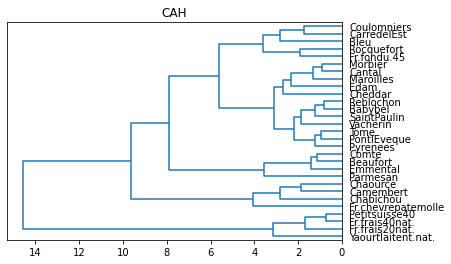

In [8]:
plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=0)
plt.show()

> Ici on construit un dendrogramme qui permet d'illustrer les arrangements de groupes générés par un regroupement ascendant hiérarchique.

## 4 - Matérialisation des groupes

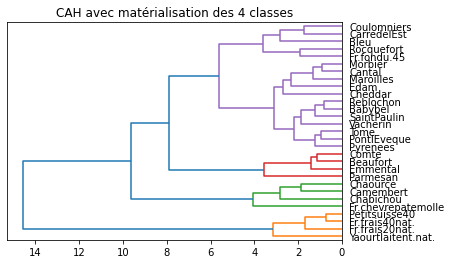

In [24]:
#matérialisation des 4 classes (hauteur t = 7)
#On choisi un niveau égale à 7 pour découper l'arbre 
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=7)
plt.show()

> Ici on métérialise les quatres groupes de fromages, en spécifiant la hauteur à 7.

In [10]:
#découpage à la hauteur t = 7 ==> 4 identifiants de groupes obtenus
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


### Interprétation du graphique :
On peut constater qu'à la hauteur t = 7, nous avons 4 familles de fromages qui se déssinent :
- Groupe de couleur orange : Constitué de fromages frais
- Groupe de couleur vert   : Constitué de fromages à pâte molle
- Groupe de couleur rouge  : Constitué de fromages consistant
- Groupe de couleur violet : Constitué de plusieurs types de fromages

<strong>Remarques :</strong> 
- IL serait intérressant de pousser l'analyse sur les fromages du groupe violet, afin de segmenter encore plus ces différents types de fromages
- Il serait opportun aussi, de comparer si ces 4 groupes de fromages représentent les différents clusters (n_clusters=4) trouvés précedemment dans l'algorithme K-Means

<strong>Conclusion :</strong> 
- Le bon nombre de cluster sur le jeux de données est donc de quatre.

## Dans le cas de dimension très élevée on passe par une ACP ou ACM selon le type de données

In [11]:
# Reducing the dimensionality of the Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_principal = pca.fit_transform(fromage_cr)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']



Temps total d'execution :  0.0641539999996894 




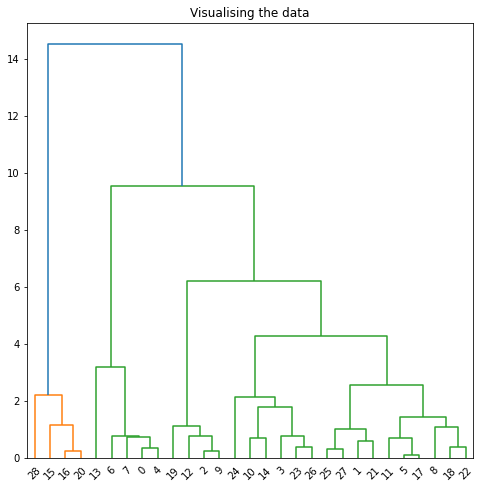

In [18]:
# Visualizing the working of the Dendograms
import time
import scipy.cluster.hierarchy as shc
 
time_start = time.perf_counter()

plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='ward')))

time_elapsed = (time.perf_counter() - time_start)

print("\n\nTemps total d'execution : ", time_elapsed, "\n\n")

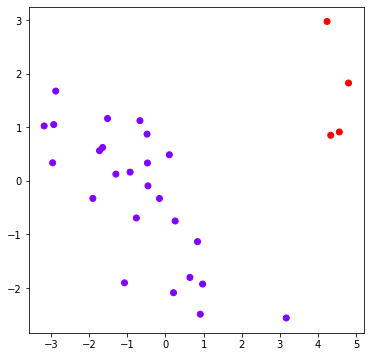

In [22]:
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering(n_clusters=2)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.show()

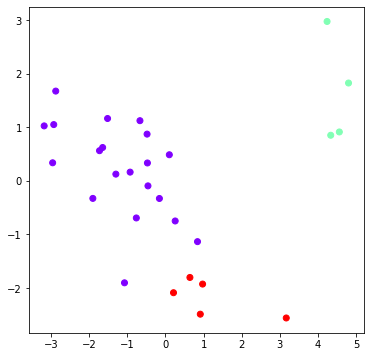

In [21]:
ac3 = AgglomerativeClustering(n_clusters=3)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=ac3.fit_predict(X_principal), cmap='rainbow')
plt.show()

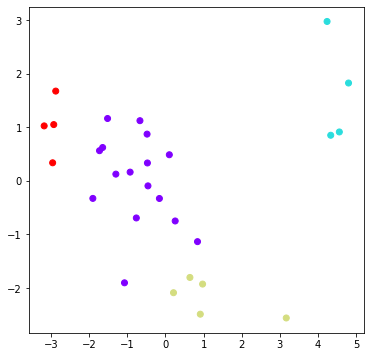

In [20]:
ac4 = AgglomerativeClustering(n_clusters=4)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=ac4.fit_predict(X_principal), cmap='rainbow')
plt.show()